# Análisis de empresas de construcción en la bolsa

## Objetivo General

- Analizar los datos reales de las empresas en su pasado para poder predecir escenarios posibles a futuro y poderlos expresar de forma gráfica.


## Objetivos Específicos

- Identificar 4 empresas relacionadas al ámbito de la construcción para analizar.
- Identificar el rendimiento diario de cada una de las acciones, en un periodo de tiempo definido (2014-2017)
- Simular 1000 escenarios para cada empresa en el 2018
- Caluclar la probabilidad de que las acciones de cada empresa aumenten su valor en un 50%
- Comparar con los datos reales del 2018

**Empresas relacionadas a la construcción a considerar**

- CATERPILLAR (CAT)
- CEMEX (CX)
- VINCI SA (VCISF)
- SKANSKA (SKSBF)

In [7]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [8]:
def get_closes(names,start,end):
    closes = web.DataReader(name=names,data_source="yahoo",start=start,end=end)
    return closes["Adj Close"] 

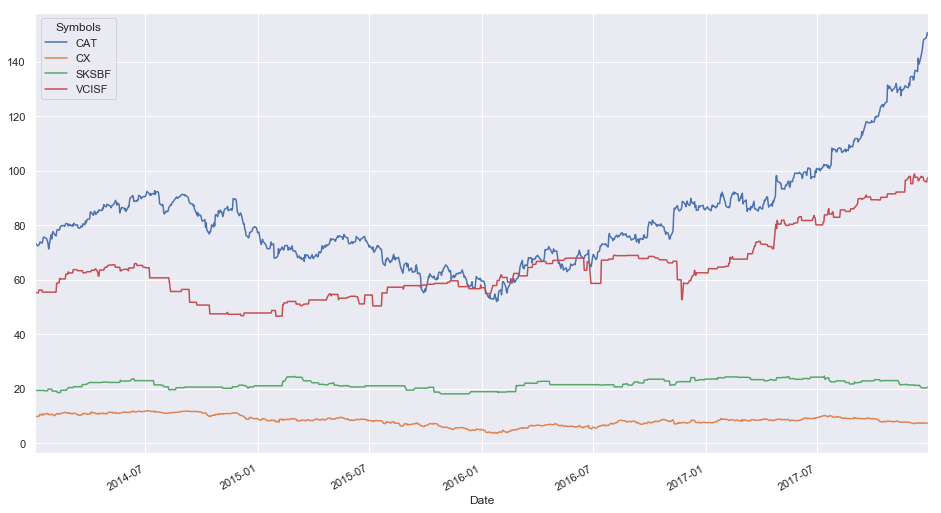

In [9]:
names=["CAT","CX","VCISF","SKSBF"] #Las etiquetas de las empresas a considerar
start, end = '2014-01-01', '2017-12-31' #Periodo de tiempo a considerar para el análisis
closes = get_closes(names,start,end) #Obtenemos la información
closes.plot(figsize=(16,9)); #Ploteamos la información generadada

In [10]:
# Función para calcular los rendimientos diarios a partir de los precios de cierre...
def calc_daily_returns(closes):
    return np.log(closes/closes.shift(1)).dropna()

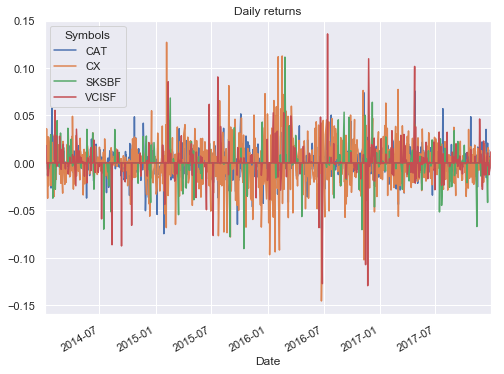

In [11]:
# Calcular rendimientos diarios y graficarlos
daily_returns = calc_daily_returns(closes)
daily_returns.plot(figsize=(8,6),title="Daily returns");

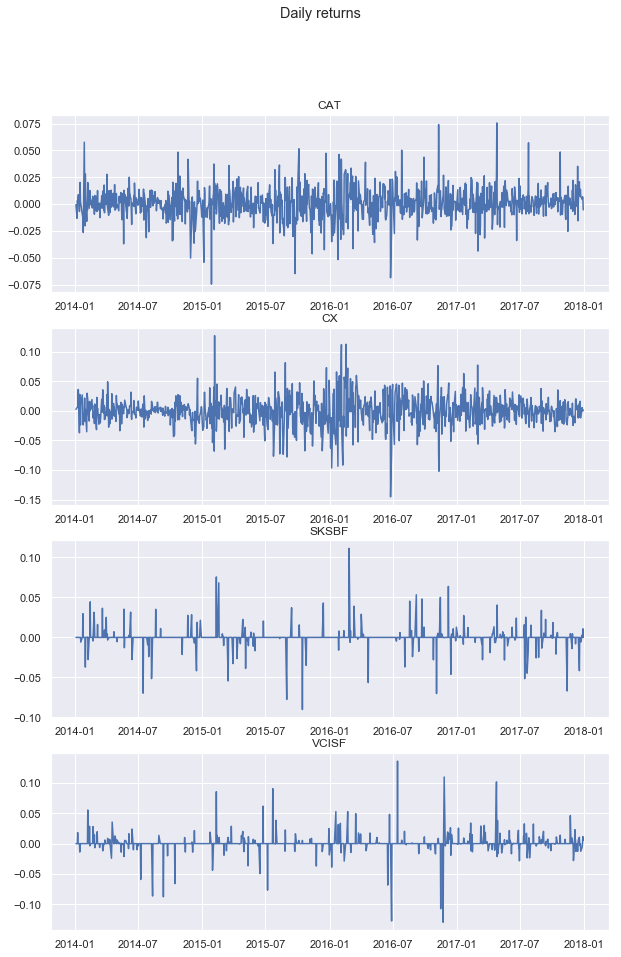

In [27]:
fig, axs = plt.subplots(4,figsize=(10,15))
fig.suptitle('Daily returns')
for i in range(4):
    axs[i].plot(daily_returns.index,daily_returns.iloc[:,i])
    axs[i].set_title(daily_returns.columns[i])

In [28]:
# Función que simula varios escenarios de rendimientos diarios
def daily_ret_sim(mu, sigma, ndays, ntraj, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(sigma*np.random.randn(ndays, ntraj)+mu, index = dates)

In [31]:
mu=daily_returns.mean().values
sigma=daily_returns.std().values

In [49]:
# Simulamos 1000 escenarios para todo el 2018
simret=[0,0,0,0]
ndays = 365
ntraj = 1000
start_date = '2018-01-01'
for i in range(4):
    simret[i]= daily_ret_sim(mu[i], sigma[i], ndays, ntraj, start_date)

In [50]:
simdata=[0,0,0,0]
for i in range(4):
    simdata[i]=(closes[names[i]].iloc[-1])*np.exp(simret[i].cumsum())

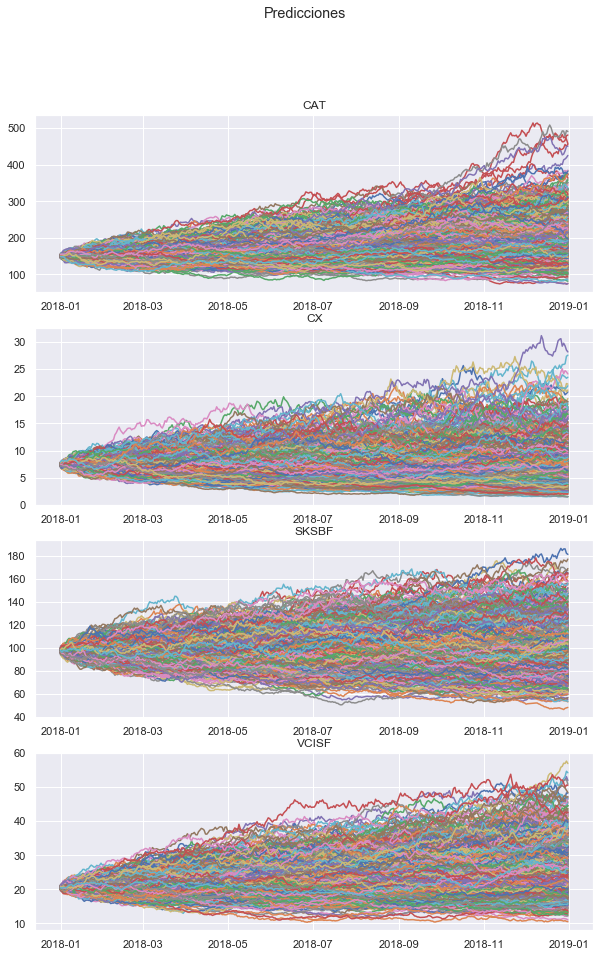

In [57]:
fig, axs = plt.subplots(4,figsize=(10,15))
fig.suptitle('Predicciones')
for i in range(4):
    axs[i].plot(simdata[i].index,simdata[i])
    axs[i].set_title(daily_returns.columns[i])

In [60]:
closes.tail(1) #Valores de cierre en el 2017

Symbols,CAT,CX,SKSBF,VCISF
Date,,,,
2017-12-29,149.884384,7.410054,20.519384,97.550842


In [61]:
K=closes.tail(1)*1.5
K

Symbols,CAT,CX,SKSBF,VCISF
Date,,,,
2017-12-29,224.826576,11.115081,30.779077,146.326263


**Ahora veremos la probabilidad de que las acciones suban en un 50% del valor de cierre para del 2017**

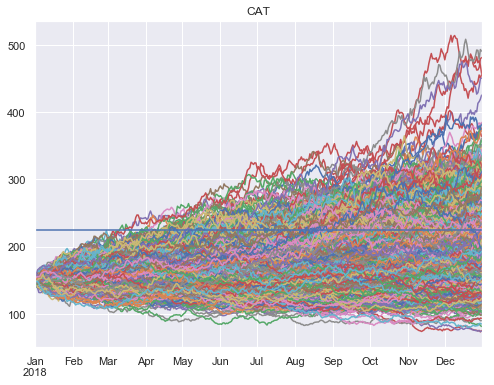

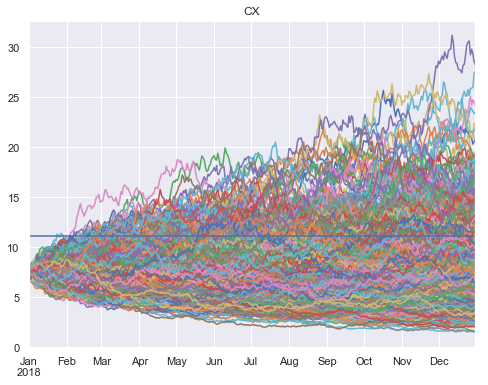

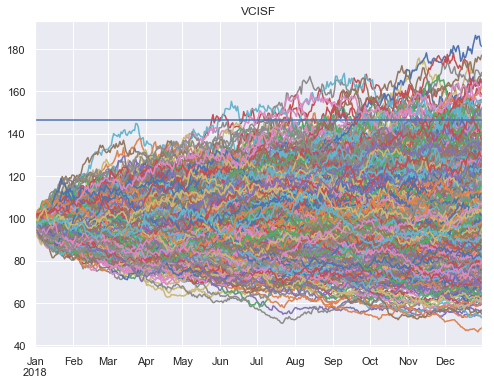

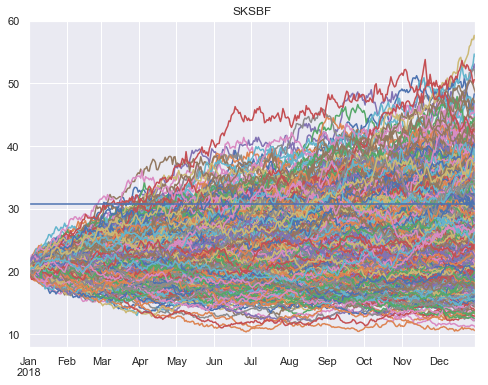

In [68]:
dates = pd.date_range('20180101',periods=ndays)
strike=[0,0,0,0]
simul=[0,0,0,0]
for i in range(4):
    strike[i]= pd.DataFrame({'Strike':K[names[i]][0]*np.ones(ndays)},index=dates)

    simul[i] = pd.concat([simdata[i].T,strike[i].T]).T

    simul[i].plot(figsize=(8,6),legend=False,title=names[i]);


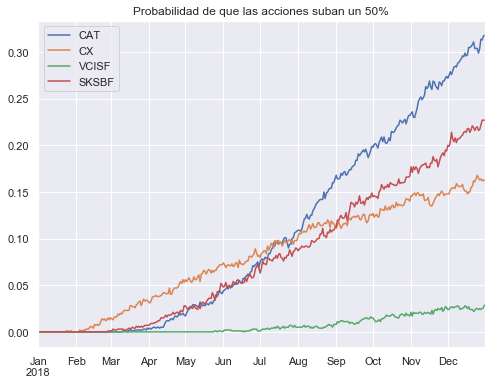

In [77]:
count=[0,0,0,0]
prob=[0,0,0,0]
for i in range(4):
    strike[i] = pd.DataFrame(K[names[i]][0]*np.ones((ndays,ntraj)),index=dates)
    count[i] = simdata[i]>strike[i]
    prob[i] = count[i].T.sum()/ntraj
    prob[i].plot(figsize=(8,6),title="Probabilidad de que las acciones suban un 50%",label=names[i]);
plt.legend();

In [83]:
for i in range(4):
    print("La probabilidad de que las acciones de {} suban un 50% es de {}%".format(names[i],prob[i].iloc[-1]*100))

La probabilidad de que las acciones de CAT suban un 50% es de 31.8%
La probabilidad de que las acciones de CX suban un 50% es de 16.2%
La probabilidad de que las acciones de VCISF suban un 50% es de 2.9000000000000004%
La probabilidad de que las acciones de SKSBF suban un 50% es de 22.7%


**Comparamos con los datos reales de 2018**

In [84]:
# Fechas de interés (inicio y fin): 2018
start_18 = '2018-01-01'
end_18 = '2018-12-31'
# Función DataReader
closes = get_closes(names,start_18,end_18) #Obtenemos la información

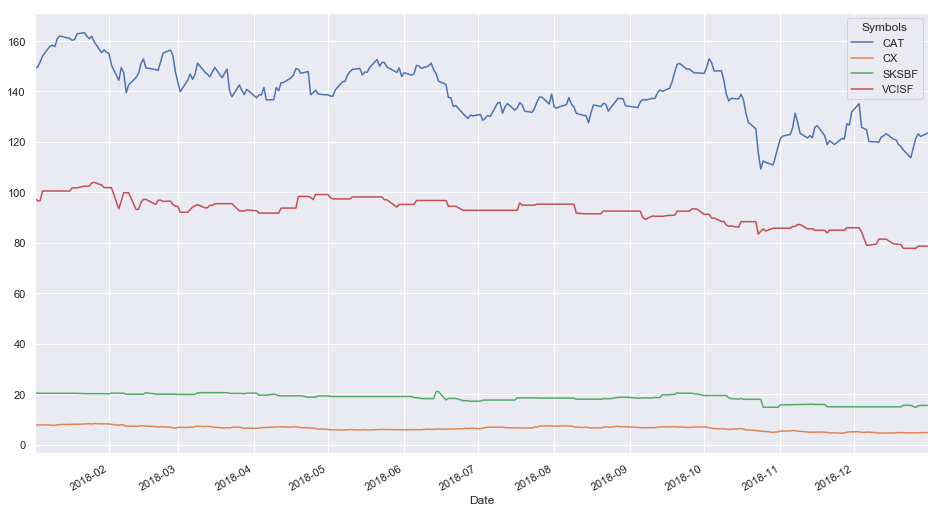

In [87]:
closes.plot(figsize=(16,9)); #Ploteamos la información generadada

In [92]:
closes.iloc[-1]

Symbols
CAT      123.567513
CX         4.762195
SKSBF     15.530000
VCISF     78.671768
Name: 2018-12-31 00:00:00, dtype: float64

In [95]:
K.values

array([[224.82657623,  11.1150806 ,  30.77907658, 146.32626343]])

In [94]:
for i in range(4):
    print("El crecimiento de {} se acercó en un {}%".format(names[i],closes.iloc[-1][i]*100/K.values[0][i]))

El crecimiento de CAT se acercó en un 54.961257064287935%
El crecimiento de CX se acercó en un 42.84444537108484%
El crecimiento de VCISF se acercó en un 50.45635366774843%
El crecimiento de SKSBF se acercó en un 53.76462594312736%


In [99]:
for i in range(4):
    print("El crecimiento real de {} fue de {} %".format(names[i],(closes.iloc[-1].values[i]/(K.values[0][i]/1.5)-1)*100))

El crecimiento real de CAT fue de -17.558114403568105 %
El crecimiento real de CX fue de -35.73333194337275 %
El crecimiento real de VCISF fue de -24.31546949837736 %
El crecimiento real de SKSBF fue de -19.353061085308955 %


**Podemos apreciar que ninguna empresa se acercó tanto al crecimiento del 50%, todos quedaron por debajo, incluso podemos ver que las acciones bajaron. Si calculamos el crecimiento nos da aproximadamente el 20% negativo para todas las empresas, lo que nos puede mostrar un patrón en las empresas de construcción**

**Esto nos puede decir que el 2018 fue un mal año para estas industrias**

**Es interesante notar que CAT era la que tenía mas probabilidad de llegar a la meta del 50% y aunque no lo logró fue la que menos decreció**
